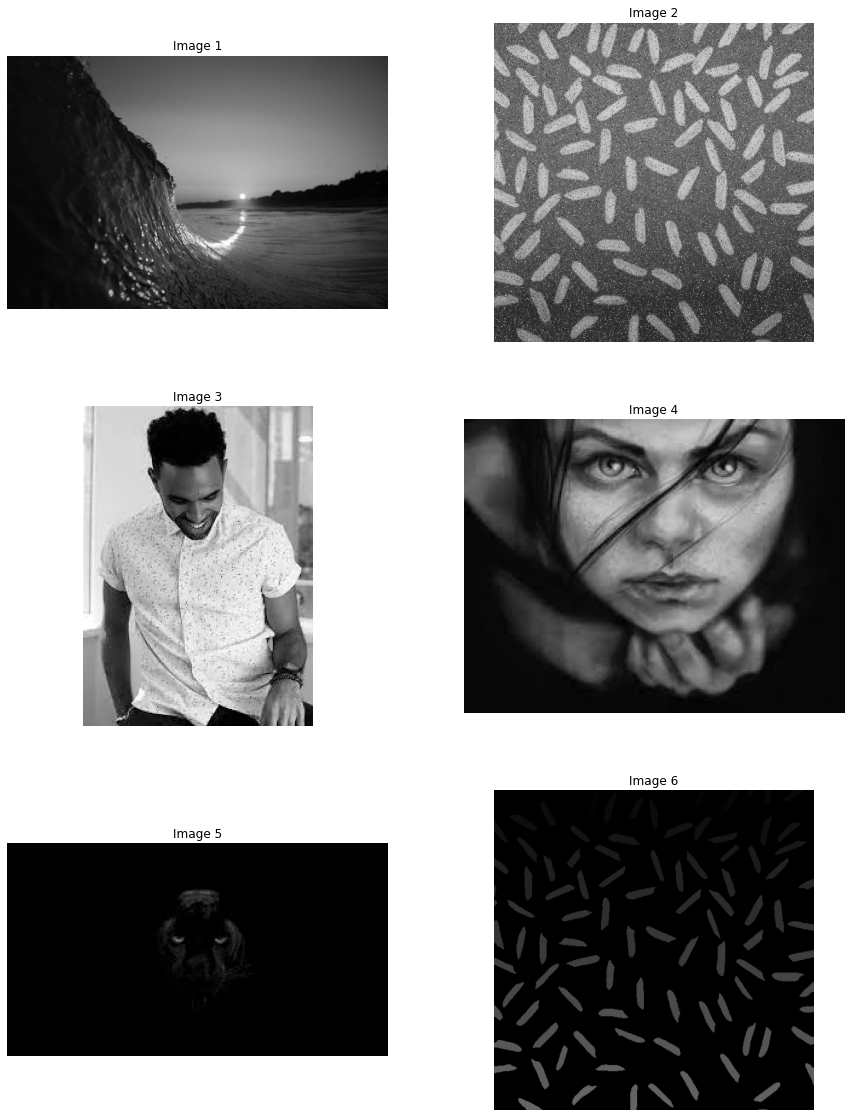

In [16]:
import cv2 # Importation de la bibliothèque opencv
import matplotlib.pyplot as plt # Importation de la bibliothèque matplotlib pour afficher une image
import numpy as np

# Détermination du chemin pour lire chaque fichier image
path1 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image1.jpg"
path2 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image5.png"
path3 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image6.jpeg"
path4 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image7.jpeg"
path5 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image8.jpeg"
path6 = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/TP3/image4.png"

# Lecture de chaque image en les transformant en image de niveau de gris
imgGray1 = cv2.imread(path1,0)
imgGray2 = cv2.imread(path2,0)
imgGray3 = cv2.imread(path3,0)
imgGray4 = cv2.imread(path4,0)
imgGray5 = cv2.imread(path5,0)
imgGray6 = cv2.imread(path6,0)

# Création d'une liste contenant les différentes images lues précédemment
imageList = [imgGray1, imgGray2, imgGray3, imgGray4, imgGray5, imgGray6]

# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    plt.imshow(cv2.cvtColor(name, cv2.COLOR_BGR2RGB)) 
    plt.axis('off') 
    plt.title("Image "+str(compt))
    compt = compt +1
    
plt.show()

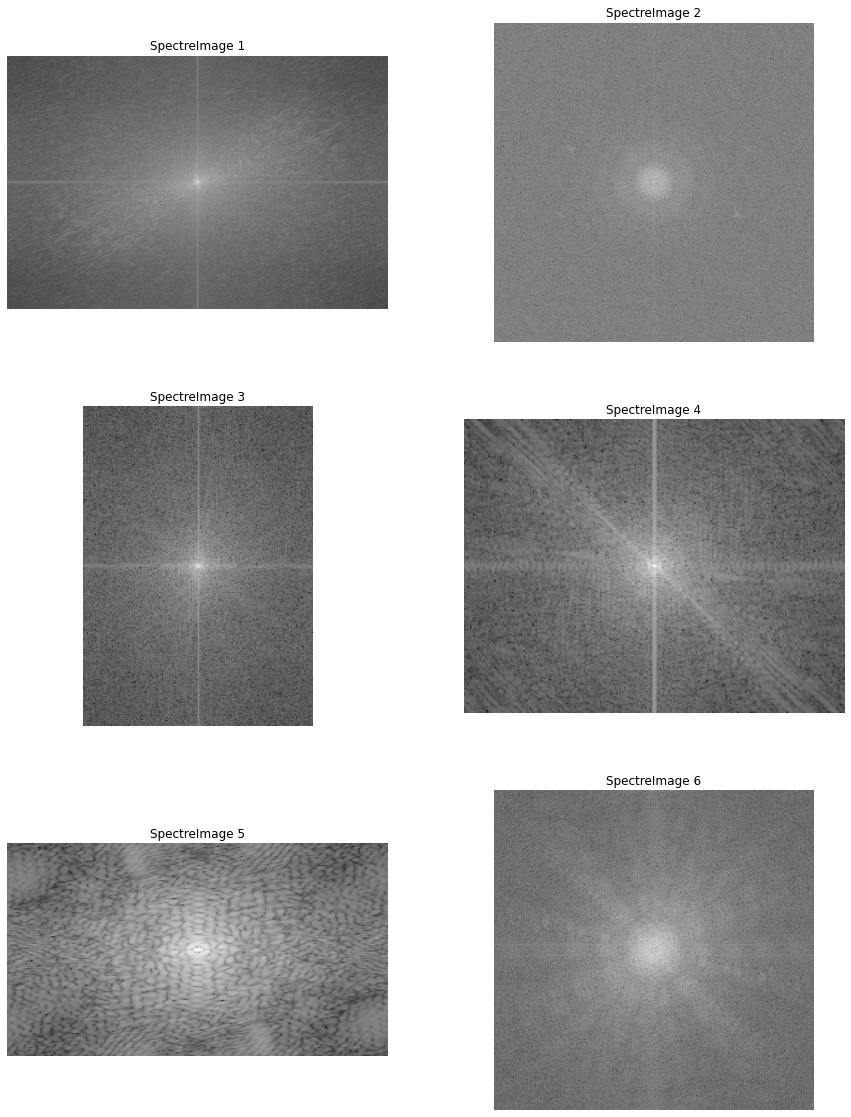

In [30]:
# Affichage du spectre de chaque image par calcul de la transformée de Fourier et du Spectre

# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Liste des différents spectres de chaque image
listSpectre = []
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    # Convertion de pixel de l'image en réel sur 32 bits parceque dft travaille avec les nombres réels
    img_float32 = np.float32(name)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage de dft de l'origine haut gauche vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    # Ajout de chaque transformée de Fourier dans une liste
    listSpectre.append(dft_shift)
    # Extraction du composant réel (0) et imaginaire (1)
    # dft_shift[:, :, 0] représente la partie réelle et dft_shift[:, :, 1] la partie imaginaire
    # Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
   
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    
    # Affichage du spectre de chaque image
    plt.imshow(magnitude_spectrum, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("SpectreImage "+str(compt))
    compt = compt +1
    
plt.show()

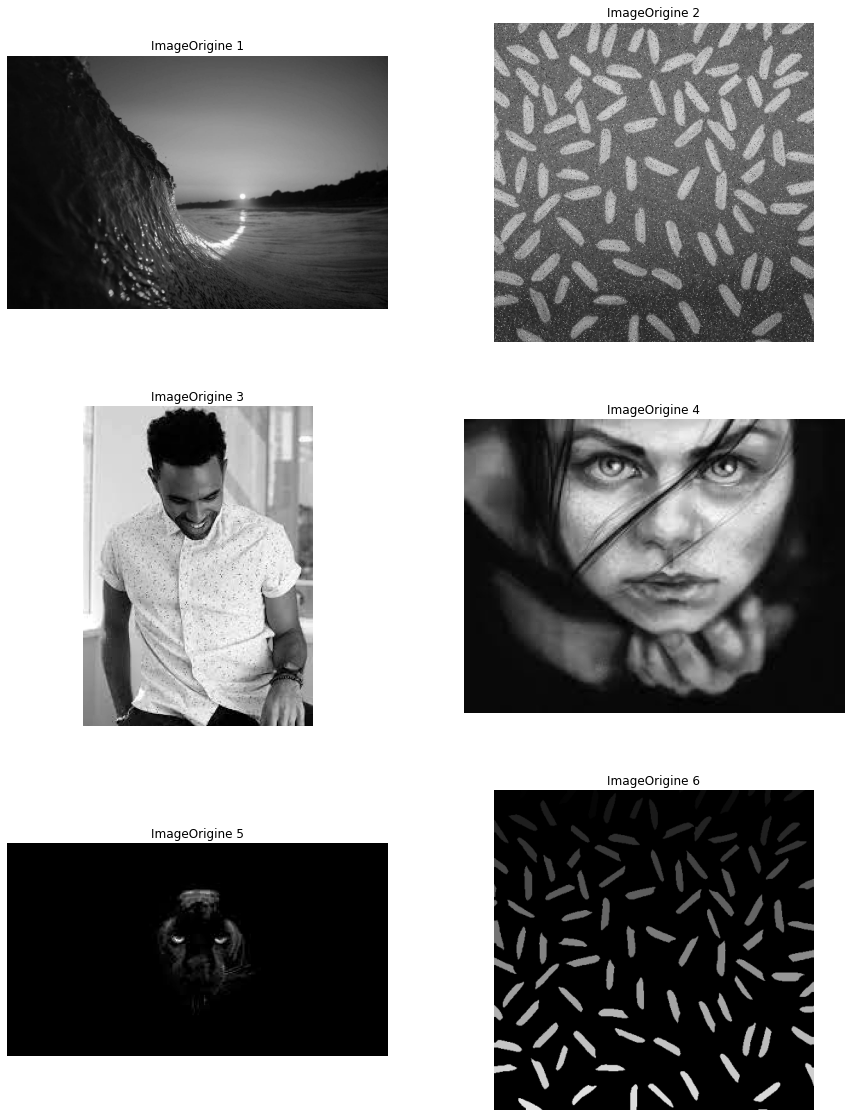

In [18]:
# Calculer la transformée de Fourier inverse pour obtention de l'image dans le domaine spatial et affichage de l'image

# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 1x3
rows = 3
columns = 2


# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in listSpectre:
    fig.add_subplot(rows, columns, compt) 
    # Récupération de l'image fréquentiel et inverse de décallage
    img_idf = np.fft.ifftshift(name)
    # Faire la transformée inverse de Fourier
    img_idf = cv2.idft(img_idf) 
    # Remet l'image dans son domaine spatial
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image dans le domaine spatial
    plt.imshow(img_idf, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("ImageOrigine "+str(compt))
    compt = compt +1
    
plt.show()


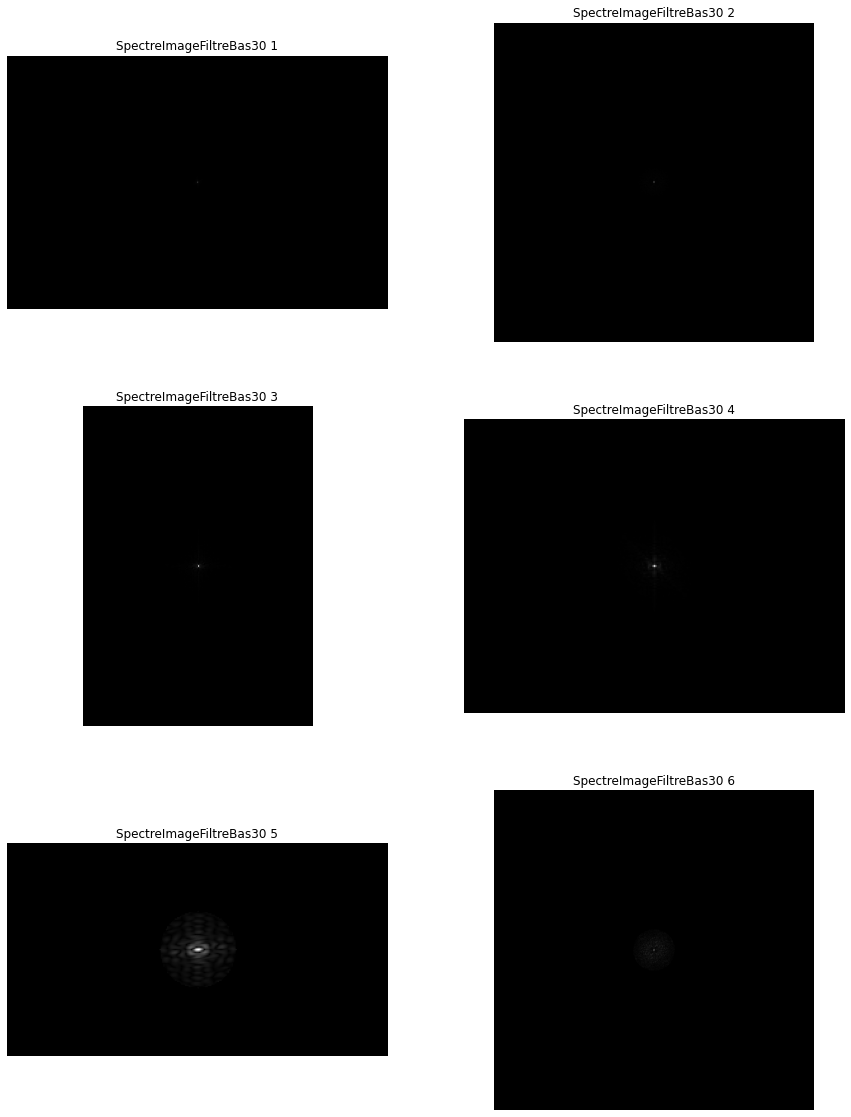

In [19]:
# Utilisation du filtre basse-bas sur la partie réel et imaginaire de la transformée de Fourier
# Coupure du spectre à 50 %
# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Liste des différents spectres de chaque image
listSpectreFiltre1 = []
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    # Récupère le nombre ligne et colonne de notre image
    row, col = name.shape
    # Faire une coupure de 50 %
    crow, ccol = row // 2, col // 2
    # Crée un masque de la taille de l'image avec pour valeur réel une
    mask = np.zeros((row, col, 2), np.uint8)
    # Définir le rayon du cercle
    r = 30
    # Définr un cercle
    center = [crow, ccol]
    # x contient le nombre de ligne de l'image et y le nombre de colonne de l'image
    x, y = np.ogrid[:row, :col]
    # Définir un cercle 
    mask_area = (x - center[0]) ** 2 + (y - center[1] ) ** 2 <= r*r
    # Mets les valeurs proches du centre à un et les valeurs loin du centre sont restées à zéro
    mask[mask_area] = 1
    # Convertion de pixel de l'image en réel sur 32 bits parceque dft travaille avec les nombres réels
    img_float32 = np.float32(name)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage de dft de l'origine haut gauche vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    # Application du masque sur la transformée de fourier
    fshift = dft_shift * mask
    # Ajouter chaque transformée de Fourier dans la liste 
    listSpectreFiltre1.append(fshift)
    # Extraction du composant réel (0) et imaginaire (1)
    # dft_shift[:, :, 0] représente la partie réelle et dft_shift[:, :, 1] la partie imaginaire
    # Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
    magnitude_spectrum = (cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
    
    # Affichage du spectre de chaque image
    plt.imshow(magnitude_spectrum, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("SpectreImageFiltreBas30 "+str(compt))
    compt = compt +1
    
plt.show()

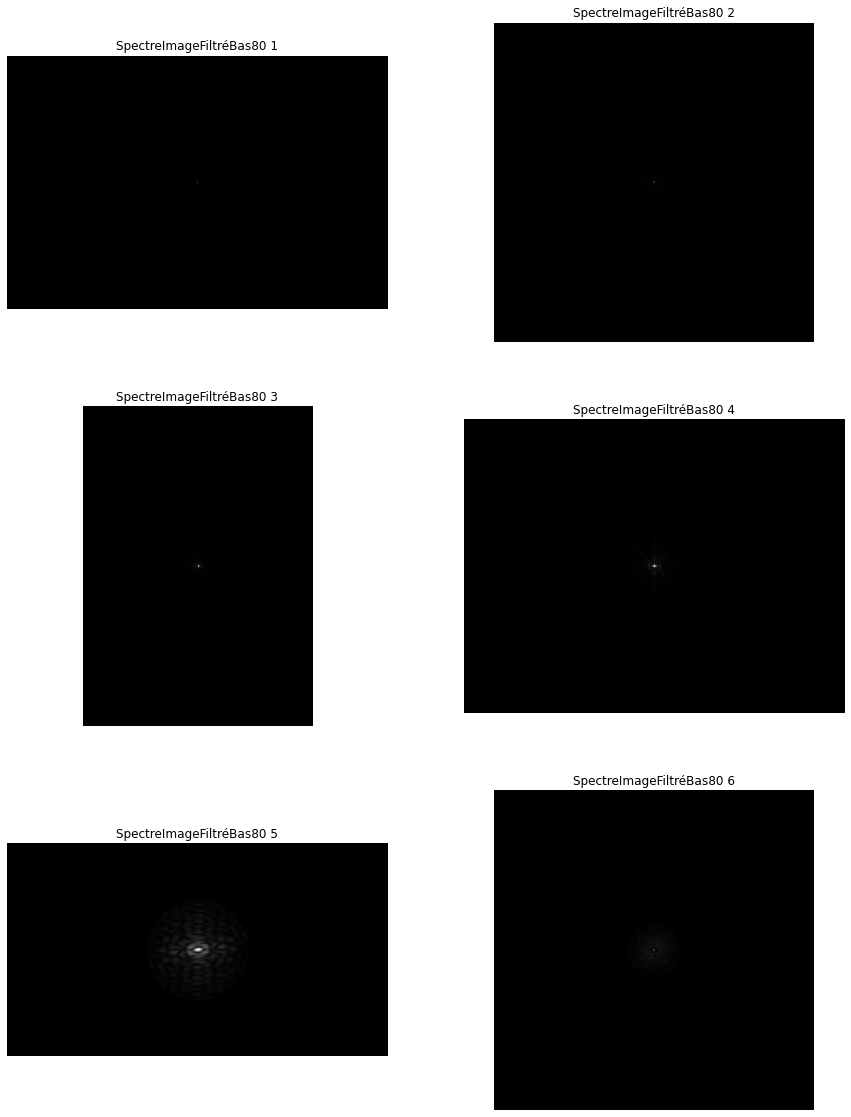

In [20]:
# Utilisation du filtre basse-bas sur la partie réel et imaginaire de la transformée de Fourier
# Coupure du spectre à 50 %
# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Liste des différents spectres de chaque image
listSpectreFiltre2 = []
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    # Récupère le nombre ligne et colonne de notre image
    row, col = name.shape
    # Faire une coupure de 50 %
    crow, ccol = row // 2, col // 2
    # Crée un masque de la taille de l'image avec pour valeur réel une
    mask = np.zeros((row, col, 2), np.uint8)
    # Définir le rayon du cercle
    r = 40
    # Définr un cercle
    center = [crow, ccol]
    # x contient le nombre de ligne de l'image et y le nombre de colonne de l'image
    x, y = np.ogrid[:row, :col]
    # Définir un cercle 
    mask_area = (x - center[0]) ** 2 + (y - center[1] ) ** 2 <= r*r
    # Mets les valeurs proches du centre à un et les valeurs loin du centre sont restées à zéro
    mask[mask_area] = 1
    # Convertion de pixel de l'image en réel sur 32 bits parceque dft travaille avec les nombres réels
    img_float32 = np.float32(name)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage de dft de l'origine haut gauche vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    # Application du masque sur la transformée de fourier
    fshift = dft_shift * mask
    # Ajouter chaque transformée de Fourier dans la liste 
    listSpectreFiltre2.append(fshift)
    # Extraction du composant réel (0) et imaginaire (1)
    # dft_shift[:, :, 0] représente la partie réelle et dft_shift[:, :, 1] la partie imaginaire
    # Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
    magnitude_spectrum = (cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
    
    # Affichage du spectre de chaque image
    plt.imshow(magnitude_spectrum, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("SpectreImageFiltréBas80 "+str(compt))
    compt = compt +1
    
plt.show()

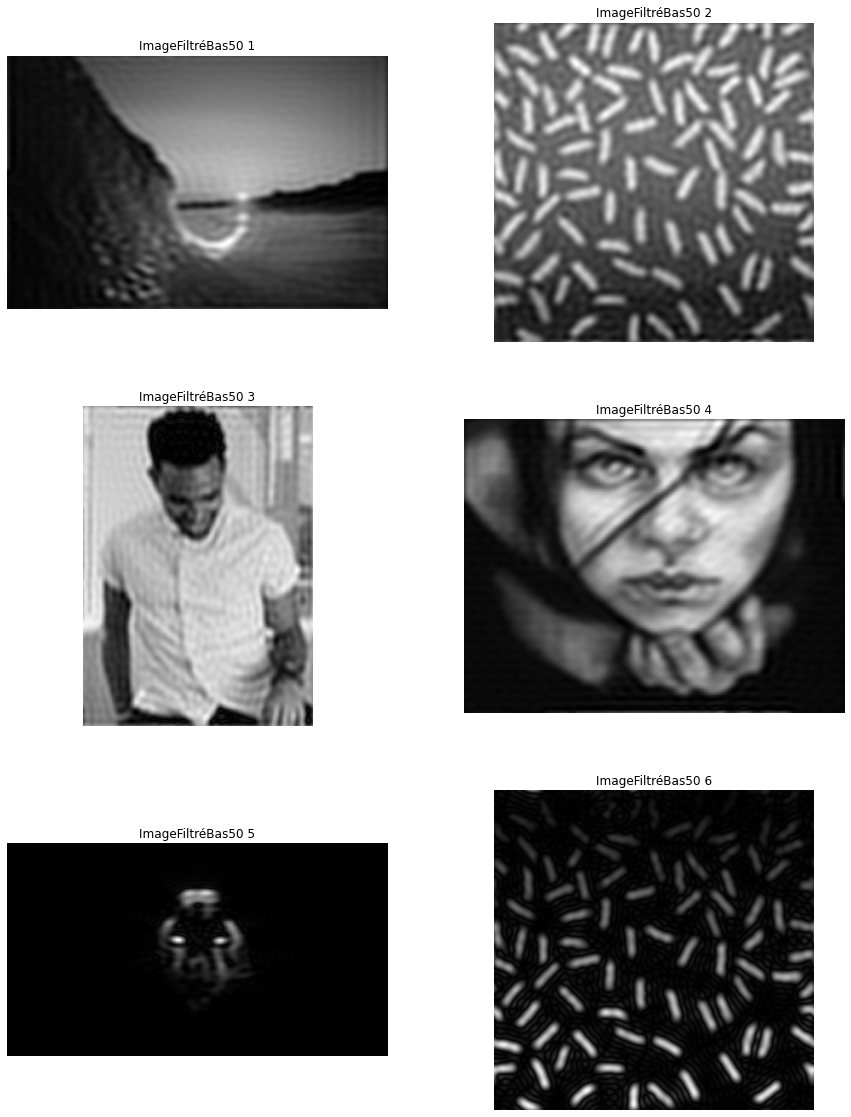

In [21]:
# Calculer la transformée de Fourier inverse pour obtention de l'image dans le domaine spatial et affichage de l'image

# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 1x3
rows = 3
columns = 2


# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in listSpectreFiltre1:
    fig.add_subplot(rows, columns, compt) 
    # Récupération de l'image fréquentiel et inverse de décallage
    img_idf = np.fft.ifftshift(name)
    # Faire la transformée inverse de Fourier
    img_idf = cv2.idft(img_idf) 
    # Remet l'image dans son domaine spatial
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image dans le domaine spatial
    plt.imshow(img_idf, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("ImageFiltréBas50 "+str(compt))
    compt = compt +1
    
plt.show()


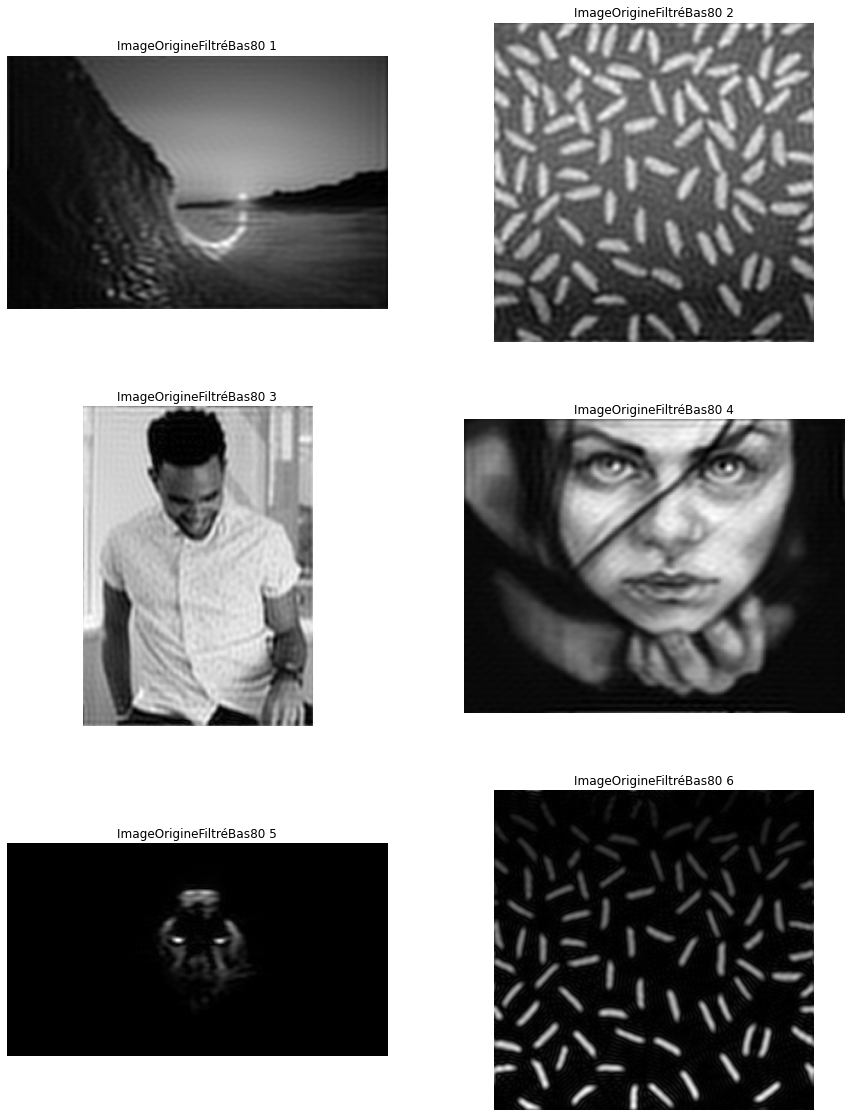

In [22]:

# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in listSpectreFiltre2:
    fig.add_subplot(rows, columns, compt) 
    # Récupération de l'image fréquentiel et inverse de décallage
    img_idf = np.fft.ifftshift(name)
    # Faire la transformée inverse de Fourier
    img_idf = cv2.idft(img_idf) 
    # Remet l'image dans son domaine spatial
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image dans le domaine spatial
    plt.imshow(img_idf, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("ImageOrigineFiltréBas80 "+str(compt))
    compt = compt +1
    
plt.show()

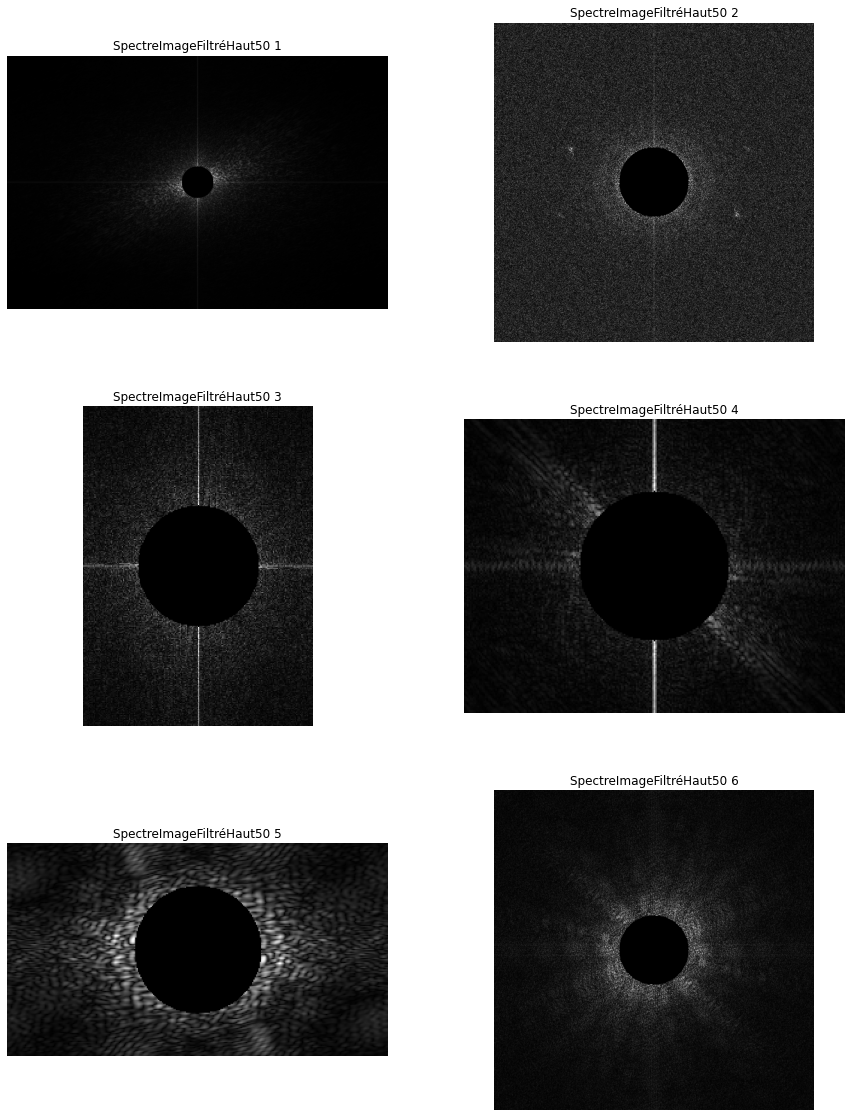

In [23]:
# Utilisation du filtre basse-haut sur la partie réel et imaginaire de la transformée de Fourier
# Coupure du spectre à 50 %
# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Liste des différents spectres de chaque image
listSpectreFiltre3 = []
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    # Récupère le nombre ligne et colonne de notre image
    row, col = name.shape
    # Faire une coupure de 50 %
    crow, ccol = row // 2, col // 2
    # Crée un masque de la taille de l'image avec pour valeur réel une
    mask = np.ones((row, col, 2), np.uint8)
    # Définir le rayon du cercle
    r = 50
    # Définr un cercle
    center = [crow, ccol]
    # x contient le nombre de ligne de l'image et y le nombre de colonne de l'image
    x, y = np.ogrid[:row, :col]
    # Définir un cercle 
    mask_area = (x - center[0]) ** 2 + (y - center[1] ) ** 2 <= r*r
    # Mets les valeurs au centre à zéro et les valeurs loin du centre sont restées à 1
    mask[mask_area] = 0
    # Convertion de pixel de l'image en réel sur 32 bits parceque dft travaille avec les nombres réels
    img_float32 = np.float32(name)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage de dft de l'origine haut gauche vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    # Application du masque sur la transformée de fourier
    fshift = dft_shift * mask
    # Ajouter chaque transformée de Fourier dans la liste 
    listSpectreFiltre3.append(fshift)
    # Extraction du composant réel (0) et imaginaire (1)
    # dft_shift[:, :, 0] représente la partie réelle et dft_shift[:, :, 1] la partie imaginaire
    # Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
    magnitude_spectrum =  (cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
    
    # Affichage du spectre de chaque image
    plt.imshow(magnitude_spectrum, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("SpectreImageFiltréHaut50 "+str(compt))
    compt = compt +1
    
plt.show()

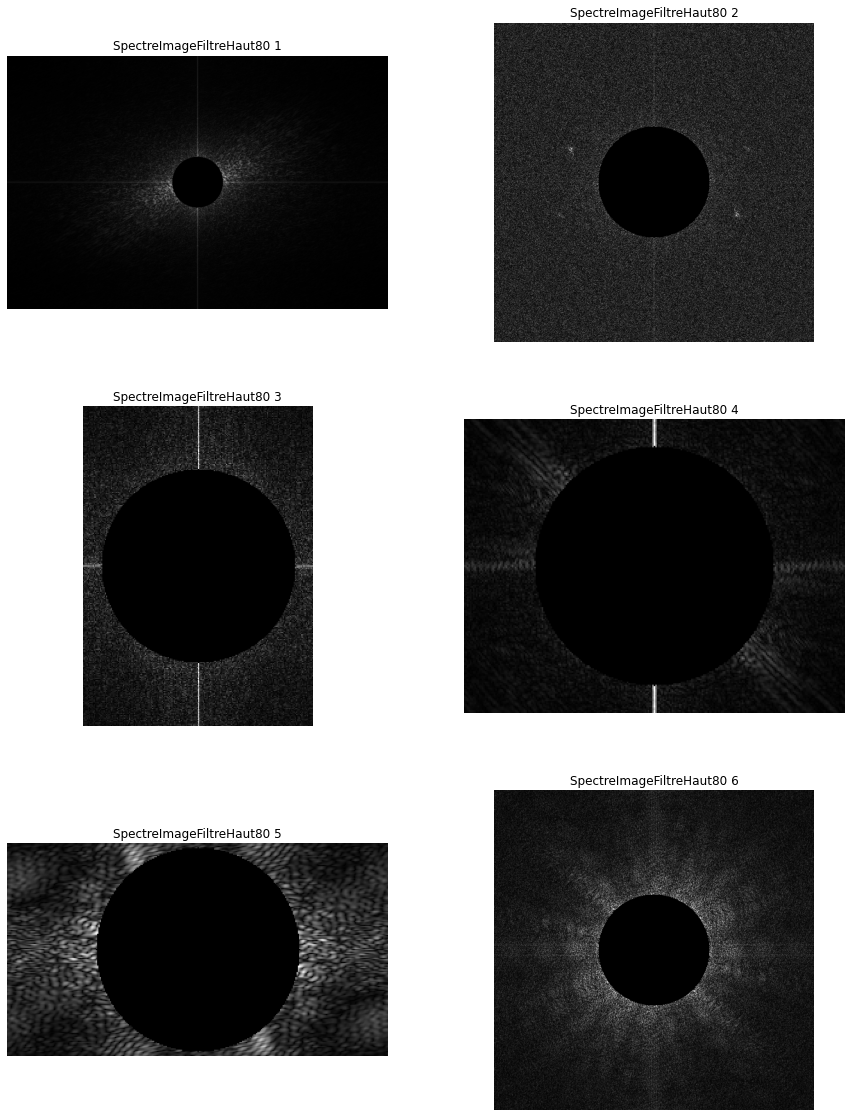

In [24]:
# Utilisation du filtre basse-haut sur la partie réel et imaginaire de la transformée de Fourier
# Coupure du spectre à 50 %
# Nombre de ligne et colonne pour faciliter l'affichage des différentes images sur 3x2
rows = 3
columns = 2

# Liste des différents spectres de chaque image
listSpectreFiltre4 = []
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in imageList:
    fig.add_subplot(rows, columns, compt) 
    # Récupère le nombre ligne et colonne de notre image
    row, col = name.shape
    # Faire une coupure de 50 %
    crow, ccol = row // 2, col // 2
    # Crée un masque de la taille de l'image avec pour valeur réel une
    mask = np.ones((row, col, 2), np.uint8)
    # Définir le rayon du cercle
    r = 80
    # Définr un cercle
    center = [crow, ccol]
    # x contient le nombre de ligne de l'image et y le nombre de colonne de l'image
    x, y = np.ogrid[:row, :col]
    # Définir un cercle 
    mask_area = (x - center[0]) ** 2 + (y - center[1] ) ** 2 <= r*r
    # Mets les valeurs au centre à zéro et les valeurs loin du centre sont restées à 1
    mask[mask_area] = 0
    # Convertion de pixel de l'image en réel sur 32 bits parceque dft travaille avec les nombres réels
    img_float32 = np.float32(name)
    # Détermine la transformée de fourier de l'image avec comme sortir un nombre complexe
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    # Décallage de dft de l'origine haut gauche vers le centre pour faciliter la visualisation
    dft_shift = np.fft.fftshift(dft)
    # Application du masque sur la transformée de fourier
    fshift = dft_shift * mask
    # Ajouter chaque transformée de Fourier dans la liste 
    listSpectreFiltre4.append(fshift)
    # Extraction du composant réel (0) et imaginaire (1)
    # dft_shift[:, :, 0] représente la partie réelle et dft_shift[:, :, 1] la partie imaginaire
    # Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
    magnitude_spectrum = (cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
    
    # Affichage du spectre de chaque image
    plt.imshow(magnitude_spectrum, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("SpectreImageFiltreHaut80 "+str(compt))
    compt = compt +1
    
plt.show()

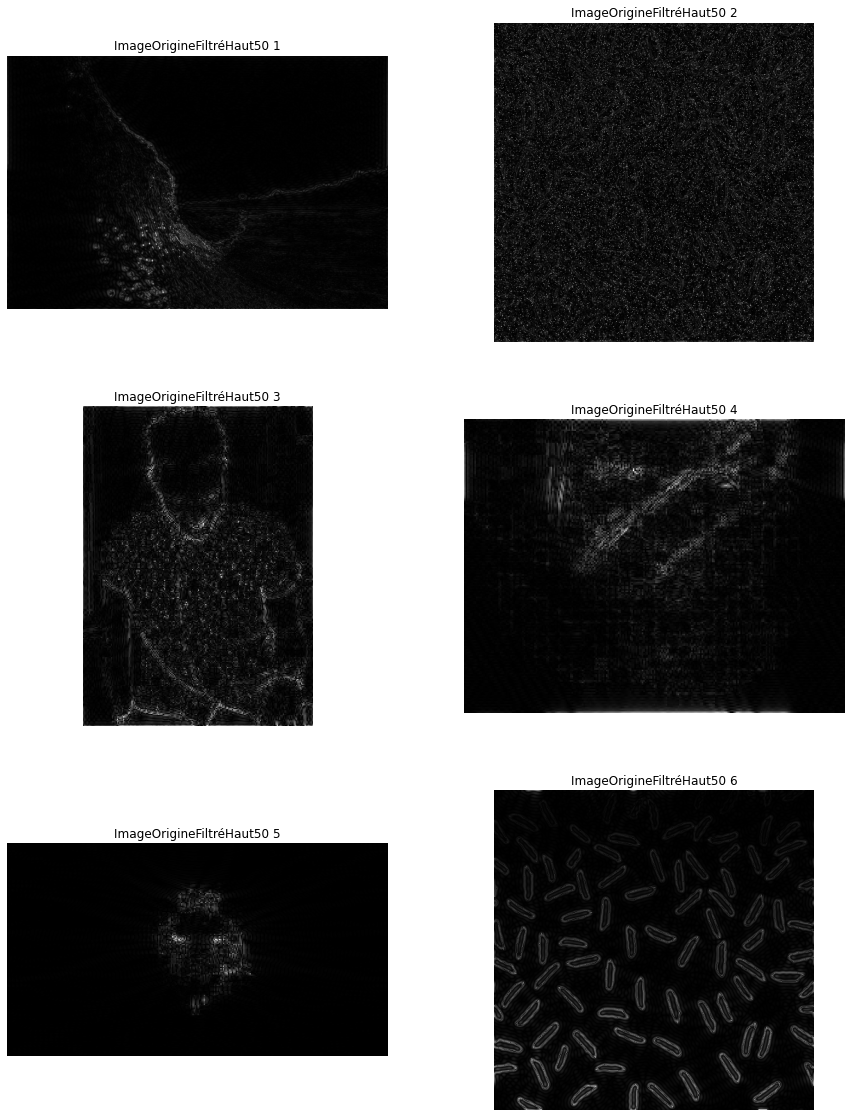

In [25]:
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in listSpectreFiltre3:
    fig.add_subplot(rows, columns, compt) 
    # Récupération de l'image fréquentiel et inverse de décallage
    img_idf = np.fft.ifftshift(name)
    # Faire la transformée inverse de Fourier
    img_idf = cv2.idft(img_idf) 
    # Remet l'image dans son domaine spatial
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image dans le domaine spatial
    plt.imshow(img_idf, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("ImageOrigineFiltréHaut50 "+str(compt))
    compt = compt +1
    
plt.show()

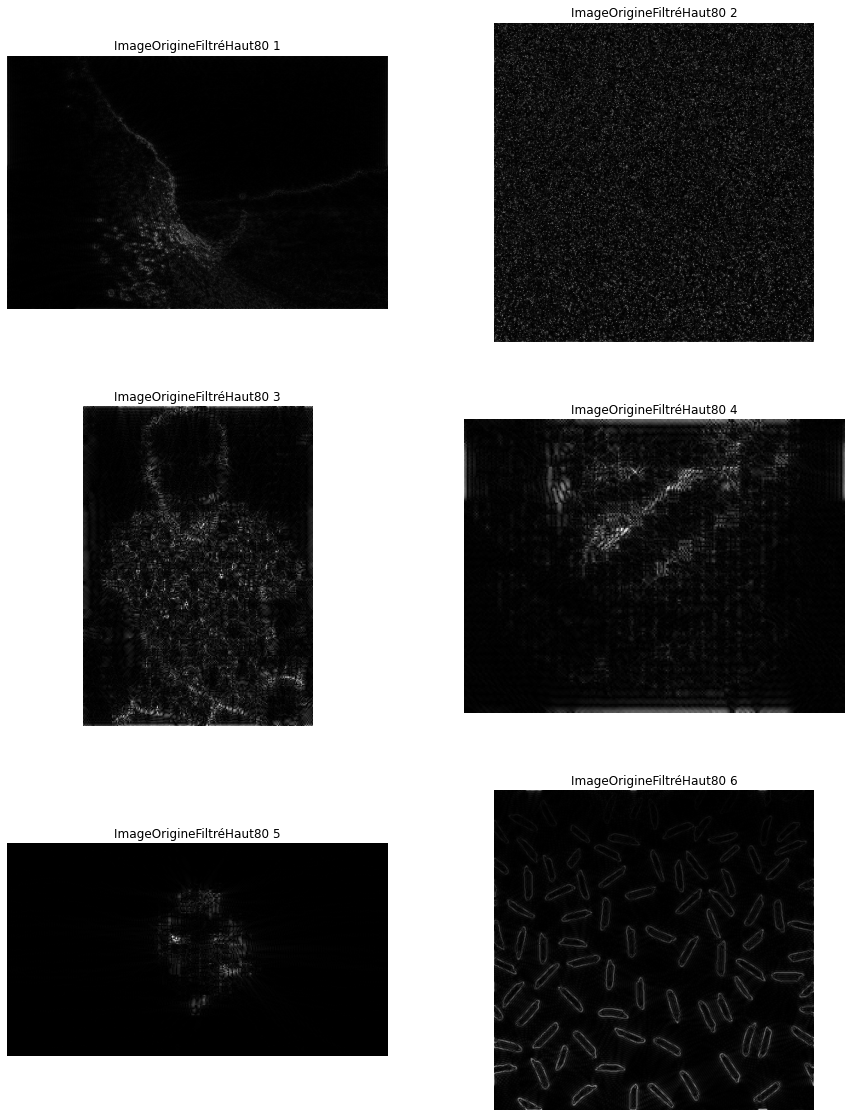

In [26]:
# Permet de définir la taille de chaque image lors de l'affichage
fig = plt.figure(figsize=(15, 20))
#Permet de parcourir chaque élément de la matricice d'affichage
compt = 1
# Parcours et récupération de chaque image de la liste des images
# pour leur afficher suivant la disposition choisie
for name in listSpectreFiltre4:
    fig.add_subplot(rows, columns, compt) 
    # Récupération de l'image fréquentiel et inverse de décallage
    img_idf = np.fft.ifftshift(name)
    # Faire la transformée inverse de Fourier
    img_idf = cv2.idft(img_idf) 
    # Remet l'image dans son domaine spatial
    img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])
    # Affichage de l'image dans le domaine spatial
    plt.imshow(img_idf, cmap='gray')
    # Désactive l'axe des axis de notre figure
    plt.axis('off') 
    # Affiche le titre de chaque spectre de l'image
    plt.title("ImageOrigineFiltréHaut80 "+str(compt))
    compt = compt +1
    
plt.show()

<ipython-input-28-a4b0643a447a>:20: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(a[:, :, 0], a[:, :, 1]))


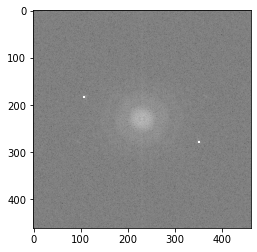

In [28]:
# Filtrage des bruits sinus d'une image et Affichage du spectre

# Récupération de l'image fréquentiel 
a = listSpectre[1]
# Faire la division entière par 2 pour se positionner au centre de l'image
r, c = rw // 2, cl // 2
# print(r, c)
# Positionnement au niveau des bruits sinus grace à ces cordonnées
r1, c1 = r-47, c-123

r2, c2 = r+49, c+120
# print(a[r2][c2])
# Mise à zéro des cordonnées de l'une des bruits sinus
a[r2][c2] = 0
# Mise à zéro des cordonnées de l'autre des bruits sinus
a[r1][c1] = 0
#print(a[r2][c2])
#print(a)
# Calcule la magnitude du spectre de chaque image par la formule 20 * np.log(cv2.magnitude())
magnitude_spectrum = 20*np.log(cv2.magnitude(a[:, :, 0], a[:, :, 1]))
# Affichage du spectre de l'image
plt.imshow(magnitude_spectrum, cmap='gray') 
plt.show()

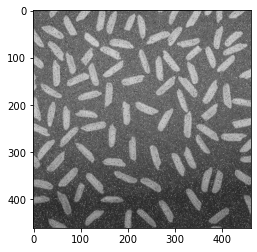

In [29]:
# Affichage de l'image filtrée (filtre des bruits sinus)
    
    
# Récupération de l'image fréquentiel 
img_idf1 = np.fft.ifftshift(a)
# Faire la transformée inverse de Fourier
img_idf1 = cv2.idft(img_idf1) 
# Remet l'image dans son domaine spatial
img_idf1 = cv2.magnitude(img_idf1[:, :, 0], img_idf1[:, :, 1])
# Affichage de l'image dans le domaine spatial
plt.imshow(img_idf1, cmap='gray')
# Affiche le titre de chaque spectre de l'image
    
plt.show()